<a href="https://colab.research.google.com/github/babakkeshavarz/time_series/blob/main/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2023-06-28 14:03:56--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2023-06-28 14:03:57 (34.8 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [4]:
df = pd.read_csv('airline_passengers.csv', index_col= 'Month' , parse_dates= True)

In [35]:
def plot_fit_and_forecast_int(result , d , col = 'Passengers'):
  fig , ax = plt.subplots(figsize = (15,5))
  ax.plot(df[col], label = 'data')

  train_pred = result.predict(start = train.index[d] , end = train.index[-1])
  ax.plot(train.index[d:] , train_pred , color = 'green' , label = 'fitted')

  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  print(conf_int)
  lower , upper = conf_int[f'lower {col}'] , conf_int[f'upper {col}']

  forecast = prediction_result.predicted_mean

  ax.plot(test.index , forecast , label = 'forecast')
  ax.fill_between(test.index, \
                  lower , upper, \
                  color = 'red' , alpha = 0.3)

  ax.legend()

In [43]:
def rmse(result , is_logged):
  forecast = result.forecast(Ntest)
  if is_logged:
    forecast = np.exp(forecast)
  t = test['Passengers']
  y = forecast
  return np.sqrt(np.mean((t-y)**2))

In [5]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df['1st_diff'] = df['Passengers'].diff()

<Axes: xlabel='Month'>

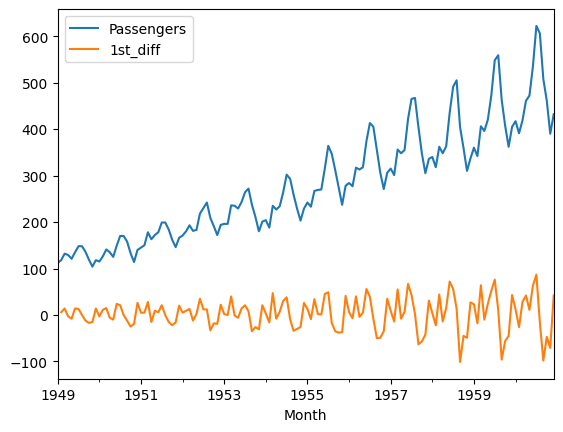

In [7]:
df.plot()

<Axes: xlabel='Month'>

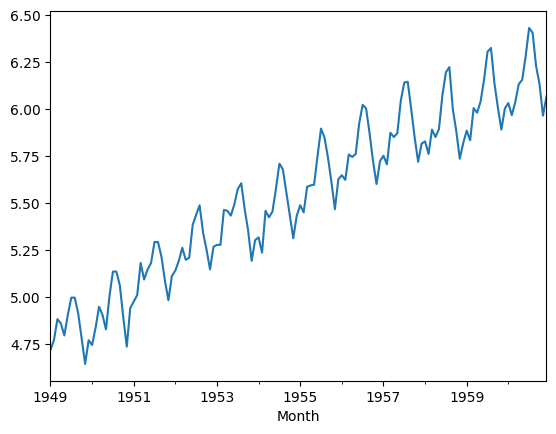

In [8]:
df['Log_Passengers'] = np.log(df['Passengers'])
df['Log_Passengers'].plot()

In [9]:
from statsmodels.tsa.arima.model import ARIMA

In [10]:
df.index.freq = 'MS'
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [11]:
#### boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [12]:
arima = ARIMA(train['Passengers'] , order = (1,0,0))
arima_result = arima.fit()

In [13]:
df.loc[train_idx , 'AR(1)'] = arima_result.predict(
                                                   start= train.index[0] ,
                                                   end = train.index[-1])

<Axes: xlabel='Month'>

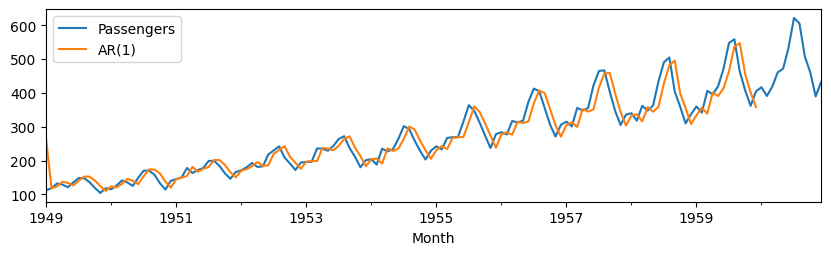

In [14]:
df[['Passengers' , 'AR(1)']].plot(figsize = (10,2.5))

In [15]:
prediction_results = arima_result.get_forecast(Ntest)
forecast = prediction_results.predicted_mean
df.loc[test_idx , 'AR(1)'] = forecast

<Axes: xlabel='Month'>

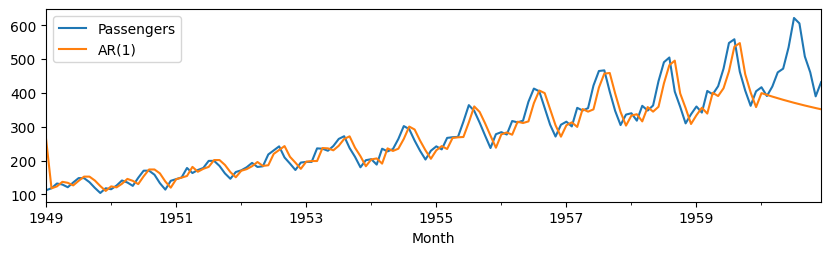

In [16]:
df[['Passengers' , 'AR(1)']].plot(figsize = (10,2.5))

<Axes: xlabel='Month'>

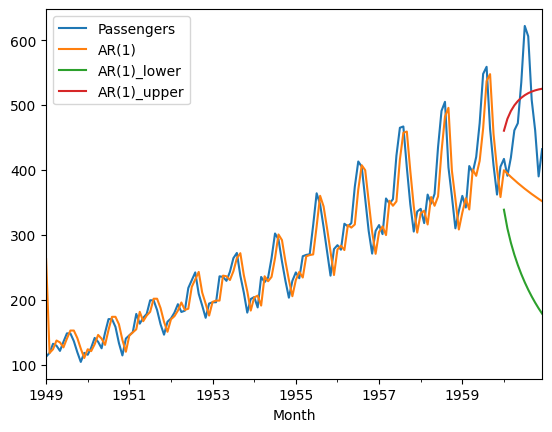

In [17]:
prediction_results = arima_result.get_forecast(Ntest)
forecast = prediction_results.predicted_mean
df.loc[test_idx , 'AR(1)'] = forecast
### Confidence intervals
df.loc[test_idx , 'AR(1)_lower'] = prediction_results.conf_int()['lower Passengers']
df.loc[test_idx , 'AR(1)_upper'] = prediction_results.conf_int()['upper Passengers']

df[['Passengers' , 'AR(1)' , 'AR(1)_lower' , 'AR(1)_upper']].plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

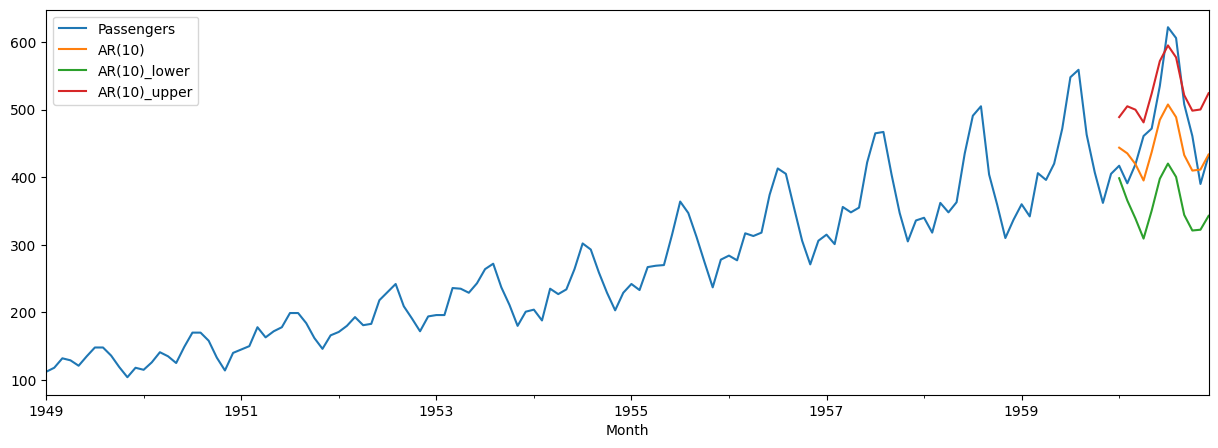

In [18]:
arima = ARIMA(train['Passengers'] , order = (10,0,0))
arima_result = arima.fit()
prediction_results = arima_result.get_forecast(Ntest)
forecast = prediction_results.predicted_mean
df.loc[test_idx , 'AR(10)'] = forecast
### Confidence intervals
df.loc[test_idx , 'AR(10)_lower'] = prediction_results.conf_int()['lower Passengers']
df.loc[test_idx , 'AR(10)_upper'] = prediction_results.conf_int()['upper Passengers']

df[['Passengers' , 'AR(10)' , 'AR(10)_lower' , 'AR(10)_upper']].plot(figsize = (15,5))

<Axes: xlabel='Month'>

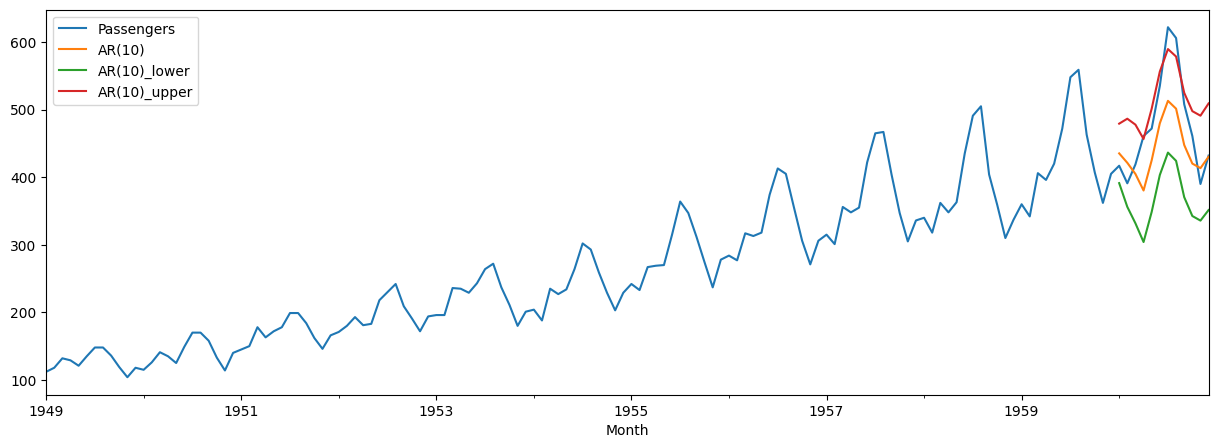

In [19]:
arima = ARIMA(train['Passengers'] , order = (8,1,1))
arima_result = arima.fit()
prediction_results = arima_result.get_forecast(Ntest)
forecast = prediction_results.predicted_mean
df.loc[test_idx , 'AR(10)'] = forecast
### Confidence intervals
df.loc[test_idx , 'AR(10)_lower'] = prediction_results.conf_int()['lower Passengers']
df.loc[test_idx , 'AR(10)_upper'] = prediction_results.conf_int()['upper Passengers']

df[['Passengers' , 'AR(10)' , 'AR(10)_lower' , 'AR(10)_upper']].plot(figsize = (15,5))

            lower Passengers  upper Passengers
1960-01-01        391.273686        479.290587
1960-02-01        356.137126        486.599936
1960-03-01        331.801711        477.789471
1960-04-01        304.082600        456.610379
1960-05-01        348.737859        501.501401
1960-06-01        403.324465        556.295544
1960-07-01        436.440735        589.650824
1960-08-01        424.233502        578.626049
1960-09-01        370.516690        524.932058
1960-10-01        342.596729        497.784834
1960-11-01        335.790768        491.082133
1960-12-01        351.434973        509.217212


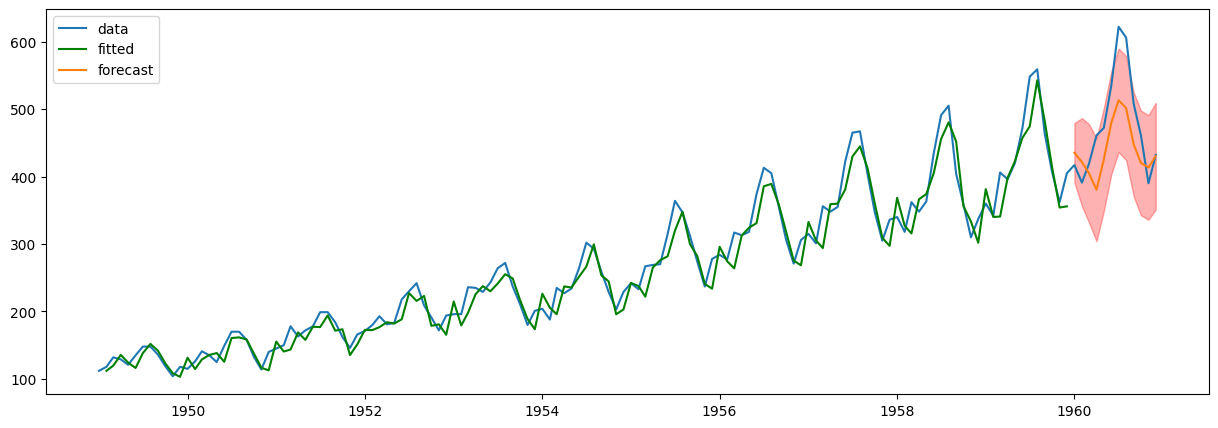

In [31]:

arima = ARIMA(train['Passengers'] , order = (8,1,1))
arima_result = arima.fit()
plot_fit_and_forecast_int(arima_result , 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            lower Log_Passengers  upper Log_Passengers
1960-01-01              5.968550              6.135382
1960-02-01              5.887736              6.122346
1960-03-01              5.999653              6.280131
1960-04-01              5.955191              6.272402
1960-05-01              6.000124              6.344682
1960-06-01              6.096230              6.466293
1960-07-01              6.213743              6.604966
1960-08-01              6.207217              6.617232
1960-09-01              6.022269              6.446185
1960-10-01              5.887745              6.325464
1960-11-01              5.769469              6.218467
1960-12-01              5.869710              6.331011


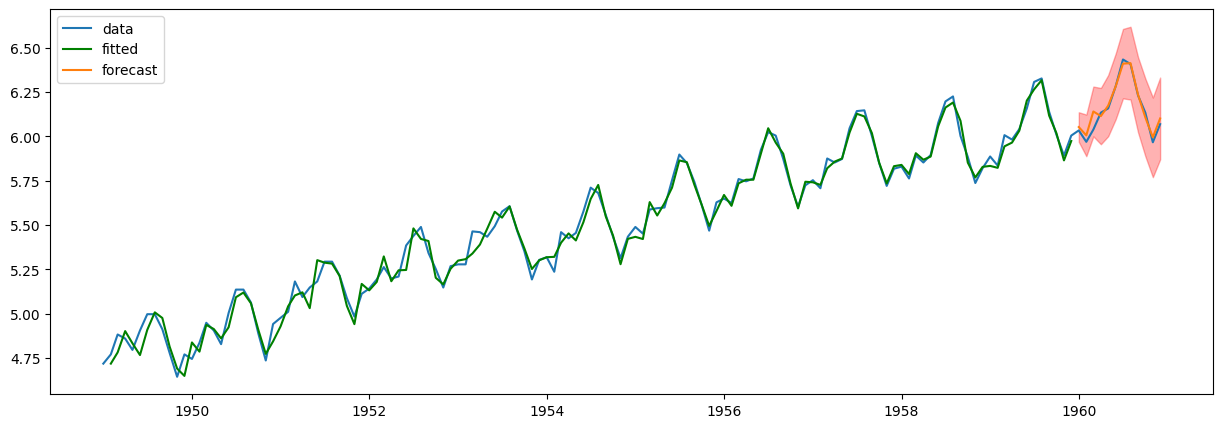

In [41]:

arima = ARIMA(train['Log_Passengers'] , order = (12,1,0))
arima_result = arima.fit()
plot_fit_and_forecast_int(arima_result , 1 , col = 'Log_Passengers')

In [44]:
arima = ARIMA(train['Log_Passengers'] , order = (12,1,0))
arima_result = arima.fit()
rmse(arima_result , is_logged = True)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


16.130971144527244

In [45]:
arima = ARIMA(train['Passengers'] , order = (12,1,0))
arima_result = arima.fit()
rmse(arima_result , is_logged = False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


17.492713779193988